<a href="https://colab.research.google.com/github/byambaa1982/timeseries/blob/master/codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Models I've used here 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

%matplotlib inline

Using TensorFlow backend.


In [0]:
# plt.figure(figsize=(15,9))
# plt.plot(df['Temperature'])
# plt.plot(df['Temperature'].rolling(10).mean())

In [0]:
# plt.figure(figsize=(15,9))
# plt.plot(df['Temperature'])
# plt.plot(df['Temperature'].rolling(30).mean())

## Backtest Machine Learning Models for Time Series Forecasting

In [0]:
# pyplot.plot([i for i in train.Temperature])
# pyplot.plot([None for i in train.Temperature] + [x for x in test.Temperature])
# plt.title('train test split')
# plt.xlabel('Number of observations')
# plt.ylabel('Temperature')
# pyplot.show()

In [0]:
df=pd.read_csv('/content/tmdata.csv')

In [0]:
# transform list into supervised learning format
def series_to_supervised(data):
  df = pd.read_csv(data)
  df['time'] = pd.to_datetime(df['time'])

  #shift target variable 5 minutes back 
  #in order to train model to predict 5 minutes into future
  n=5 # 5 minutes
  df['Temp-1'] = df['Temperature'].shift(-int(n/5))
  df = df.dropna()

  #make numpy arrays
  x = np.array(df[['Temperature', 'humidity']])
  y = np.array(df['Temp-1']).reshape(-1,1)
  return x,y

In [0]:
#custom backtest function
def backtest(n_days, model):
    x,y =series_to_supervised(data)
    predictions = []
    true_values = []
    for i in reversed(range(1, n_days)):
        x_train = x[:len(x)-i]
        y_train = y[:len(y)-i].ravel()
        x_test = x[len(x)-i]
        y_test = y[len(y)-i].ravel()
        model = model
        model.fit(x_train, y_train)
        predictions.append(model.predict([x_test])[0])
        true_values.append(y_test[0])
    return true_values, predictions

In [0]:
# root mean squared error or rmse
def measure_rmse(true_values, predictions):
	return np.sqrt(mean_squared_error(true_values, predictions))

In [0]:
backtest(n_days, model)
measure_rmse()

In [0]:
br=BayesianRidge()
rf=RandomForestRegressor(n_estimators=1000,
                               n_jobs=-1,
                                random_state=0)
ada=AdaBoostRegressor()

##Bayesian Ridge linear regressor

In [0]:
true_values=backtest(20,br)[0]
predictions=backtest(20,br)[1]

In [126]:
measure_rmse(true_values, predictions)

0.05187151054766359

No handles with labels found to put in legend.


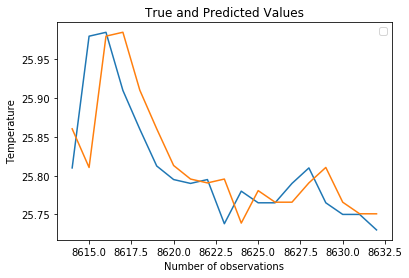

In [120]:
# pyplot.plot([i for i in y[8600:8615]])
pyplot.plot([None for i in y] + [x for x in true_values])
pyplot.plot([None for i in y] + [x for x in predictions])
plt.title('True and Predicted Values')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
plt.legend()
pyplot.show()

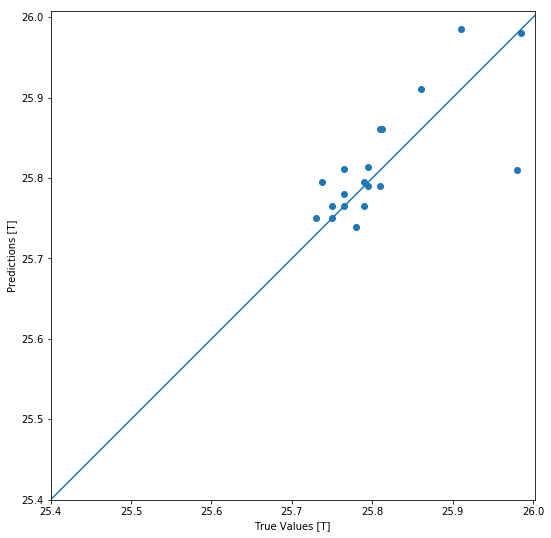

In [121]:
true_values=backtest(20,br)[0]
predictions=backtest(20,br)[1]
plt.figure(figsize=(15,9))
plt.scatter(true_values, predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([25.4,plt.xlim()[1]])
plt.ylim([25.4,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

## GridSearch on Bayesian Ridge

In [0]:
# define dataset
series = read_csv('/tmdata', header=0, index_col=0)
data = series.values
# data split
n_test = 12
# model configs
cfg_list = model_configs()
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores[:3]:
	print(cfg, error)

## RandomForest Regressor

No handles with labels found to put in legend.


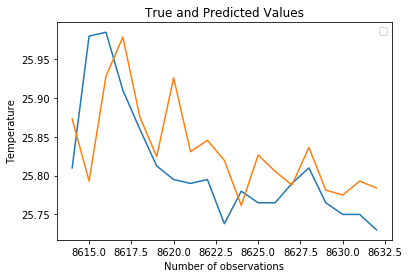

In [132]:
true_values=backtest(20,rf)[0]
predictions=backtest(20,rf)[1]
# pyplot.plot([i for i in y[8600:8615]])
pyplot.plot([None for i in y] + [x for x in true_values])
pyplot.plot([None for i in y] + [x for x in predictions])
plt.title('True and Predicted Values')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
plt.legend()
pyplot.show()

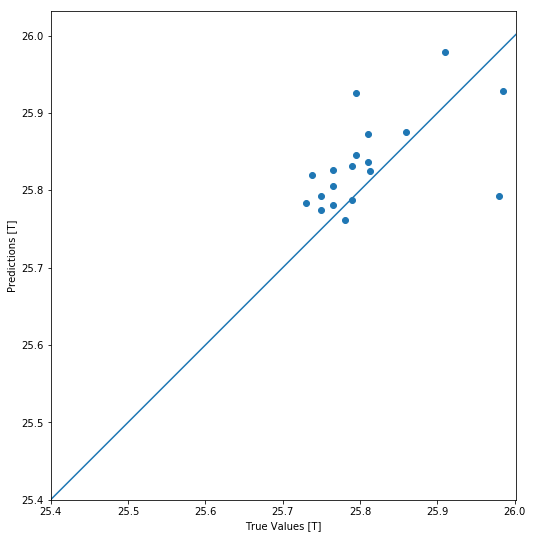

In [133]:
# true_values=backtest(20,rf)[0]
# predictions=backtest(20,rf)[1]
plt.figure(figsize=(15,9))
plt.scatter(true_values, predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([25.4,plt.xlim()[1]])
plt.ylim([25.4,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

## AdaBoost Regressor

No handles with labels found to put in legend.


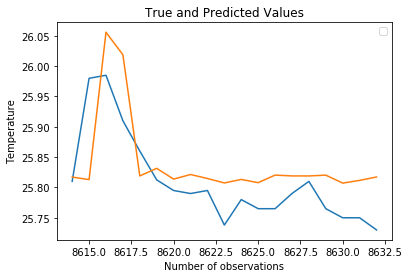

In [0]:
true_values=backtest(20,ada)[0]
predictions=backtest(20,ada)[1]
# pyplot.plot([i for i in y[8600:8615]])
pyplot.plot([None for i in y] + [x for x in true_values])
pyplot.plot([None for i in y] + [x for x in predictions])
plt.title('True and Predicted Values')
plt.xlabel('Number of observations')
plt.ylabel('Temperature')
plt.legend()
pyplot.show()

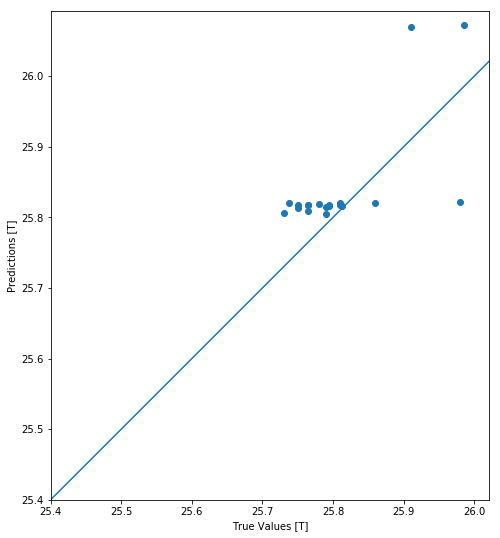

In [0]:
true_values=backtest(20,ada)[0]
predictions=backtest(20,ada)[1]
plt.figure(figsize=(15,9))
plt.scatter(true_values, predictions)
plt.xlabel('True Values [T]')
plt.ylabel('Predictions [T]')
# plt.axis('equal')
plt.axis('square')
plt.xlim([25.4,plt.xlim()[1]])
plt.ylim([25.4,plt.ylim()[1]])
_ = plt.plot([0, 310], [0, 310])

In [0]:
# Performance metrics
errors = abs(df_chart.pred - df_chart.true)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / df_chart.true)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.06 degrees.
Accuracy: 99.75 %.


## Accuracies and Average Absolute Errors for each model

In [0]:
def accuracy_cal(n, model):
  true_values=backtest(20, model)[0]
  predictions=backtest(20, model)[1]
  both={'true':true_values,'pred':predictions}
  df_chart=pd.DataFrame.from_dict(both)
  errors = abs(df_chart.pred - df_chart.true)
  mape = 100 * (errors / df_chart.true)
  accuracy = 100 - np.mean(mape)
  
  print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
  print('Accuracy:', round(accuracy, 2), '%.')

In [0]:
accuracy_cal(20, ada)

Average absolute error: 0.09 degrees.
Accuracy: 99.66 %.


In [0]:
accuracy_cal(20, br)

Average absolute error: 0.06 degrees.
Accuracy: 99.75 %.


In [136]:
accuracy_cal(20, rf)

Average absolute error: 0.05 degrees.
Accuracy: 99.8 %.


# Sliding Window or Walk Forward Validation

In [0]:
df = pd.read_csv('/tmdata.csv')
df['time'] = pd.to_datetime(df['time'])

#shift target variable 5 minutes back 
#in order to train model to predict 5 minutes into future
n=5 # 5 minutes
df['Temp-1'] = df['Temperature'].shift(-int(n/5))
df = df.dropna()

#make numpy arrays
x = np.array(df[['Temperature', 'humidity']])
y = np.array(df['Temp-1']).reshape(-1,1)

In [0]:
df=pd.read_csv('/content/tmdata.csv')

In [0]:
def series_to_supervised(df):
  df['time'] = pd.to_datetime(df['time'])

  #shift target variable 5 minutes back 
  #in order to train model to predict 5 minutes into future
  n=5 # 5 minutes
  df['Temp-1'] = df['Temperature'].shift(-int(n/5))
  df = df.dropna()

  #make numpy arrays
  x = np.array(df[['Temperature', 'humidity']])
  y = np.array(df['Temp-1']).reshape(-1,1)
  return x,y

In [0]:
#custom backtest function
def walk_forward_validation(n_records, model):
    predictions = []
    true_values = []
    x,y= series_to_supervised(df)
    for i in reversed(range(n_records, len(x))):
        x_train = x[0:i]
        y_train = y[0:i].ravel()
        x_test = x[i:i+1]
        y_test = y[i:i+1].ravel()
        model = model
        model.fit(x_train, y_train)
        predictions.append(model.predict([x_test][0]))
        true_values.append(y_test[0])
    return true_values, predictions

In [0]:
true_values=walk_forward_validation(8590,br)[0]
predictions=walk_forward_validation(8590,br)[1]

In [0]:
def plotting(true_values,predictions):
  x,y= series_to_supervised(df)
  pyplot.plot([None for i in y] + [x for x in true_values])
  pyplot.plot([None for i in y] + [x for x in predictions])
  plt.title('True and Predicted Values')
  plt.xlabel('Number of observations')
  plt.ylabel('Temperature')
  plt.legend()
  pyplot.show()

In [0]:
def accuracy_cal(n, model):
  true_values=walk_forward_validation(n,br)[0]
  predictions=walk_forward_validation(n,br)[1]
  both={'true':true_values,'pred':predictions}
  df_chart=pd.DataFrame.from_dict(both)
  errors = abs(df_chart.pred - df_chart.true)
  mape = 100 * (errors / df_chart.true)
  accuracy = 100 - np.mean(mape)
  
  print('Average absolute error:',np.mean(errors))
  print('Accuracy:', accuracy)

In [67]:
accuracy_cal(8590, br)

Average absolute error: [0.03466126]
Accuracy: [99.86593534]


# Generalize model

In [0]:
# grid search persistence models for airline passengers
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error

In [0]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [0]:
# transform list into supervised learning format
def series_to_supervised(data):
  data['time'] = pd.to_datetime(data['time'])

  #shift target variable 5 minutes back 
  #in order to train model to predict 5 minutes into future
  n=5 # 5 minutes
  data['Temp-1'] = data['Temperature'].shift(-int(n/5))
  data = data.dropna()

  #make numpy arrays
  x = np.array(data[['Temperature', 'humidity']])
  y = np.array(data['Temp-1']).reshape(-1,1)
  return x,y

In [0]:

 # root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [0]:
# difference dataset
def difference(data, order):
	return [data[i] - data[i - order] for i in range(order, len(data))]

In [0]:
# fit a model
def model_fit(train, config):
	# unpack config
	n_input = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	# transform series into supervised format
	data = series_to_supervised(train, n_input)
	# separate inputs and outputs
	train_x, train_y = data[['Temperature', 'humidity']], data['Temp-1']
	# define model
	model = BayesianRidge()
	# fit model
	model.fit(train_x, train_y)
	return model

In [0]:
n_diff=0

In [0]:
# forecast with the fit model
def model_predict(model, history, config):
	# unpack config
	n_input = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	# shape input for model
	x_input = np.array(history[-n_input:]).reshape((1, n_input))
	# make forecast
	yhat = model.predict(x_input, verbose=0)
	# correct forecast if it was differenced
	return correction + yhat[0]

In [0]:

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  x,y=series_to_supervised(data)
  predictions = list()
  # split dataset
  train, test = train_test_split(data, n_test)
  # fit model
  model = model_fit(train, cfg)
  # seed history with training dataset
  history = [x for x in train]
  # step over each time-step in the test set
  for i in range(len(test)):
    # fit model and make forecast for history
    yhat = model_predict(model)
    # store forecast in list of predictions
    predictions.append(yhat)
    # add actual observation to history for the next loop
    history.append(test[i])
  # estimate prediction error
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	print(' > %.3f' % error)
	return error